In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline

### 1
#### Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

$$y = a + bx$$

$$b = \frac{\overline{xy} - \overline{x} \cdot \overline{y}}{\overline{x^2} - (\overline{x})^2}$$


$$ a = \overline{y} - b \cdot \overline{x}$$

In [2]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [3]:
b = ((x*y).mean() - x.mean() * y.mean()) / ((x**2).mean() - x.mean()**2)
b

2.620538882402765

In [4]:
a = y.mean() - b * x.mean()
a

444.1773573243596

In [5]:
def predict(x, b, a=0):
    return a + b * x
y_predict = predict(x, b, a)
y_predict

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

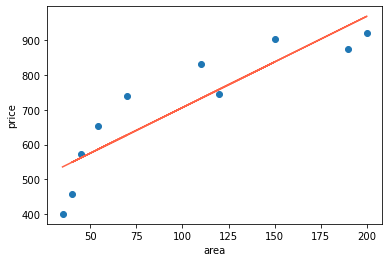

In [6]:
def get_plot(x, y, y_predict):
    fig, ax = plt.subplots()
    fig.set_figwidth(6)
    fig.set_figheight(4)
    plt.scatter(x, y)
    plt.plot(x, y_predict, color='tomato')
    plt.xlabel('area')
    plt.ylabel('price')
    plt.show()
get_plot(x, y, y_predict)

#### Найдем коэффициент линейной регрессии при X, без интерсепта
$$y = bx$$

$$b = \frac{\sum_{i=1}^{n} x_i \cdot y_i}{\sum_{i=1}^{n} x_i^2}$$

In [7]:
b = (x.dot(y))/x.dot(x)
b

5.889820420132689

In [8]:
y_predict = predict(x, b)
y_predict

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

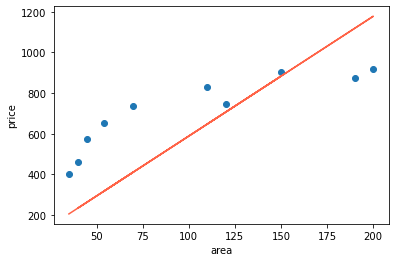

In [9]:
get_plot(x, y, y_predict)

### 3
#### Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

$$MSE = \frac{(y_{pred} - y)^2}{n} = \frac{1}{n} \cdot (bx - y)^2$$

$$MSE' = \frac{2}{n} \cdot (bx - y) \cdot x$$

In [10]:
def mse(b, x, y):
    return np.sum((b*x - y)**2)/len(x)

In [26]:
alpha = 1e-5
b = 1

In [48]:
for i in range(31):
    b -= alpha*(2/len(x)) * np.sum((b*x - y)*x)
    if i%3==0:
        print(f'iteration = {i}, b = {b}, mse = {mse(b, x, y)}')

iteration = 0, b = 2.347302, mse = 229405.42884192182
iteration = 3, b = 4.5428137724967375, mse = 81513.49216715519
iteration = 6, b = 5.377634824014467, mse = 60130.93016935293
iteration = 9, b = 5.695067049515413, mse = 57039.38936009754
iteration = 12, b = 5.815767429079743, mse = 56592.40716141274
iteration = 15, b = 5.86166252244647, mse = 56527.781430015966
iteration = 18, b = 5.879113665539337, mse = 56518.43769066604
iteration = 21, b = 5.885749285447859, mse = 56517.08675098376
iteration = 24, b = 5.888272412519596, mse = 56516.891428965806
iteration = 27, b = 5.889231805961037, mse = 56516.863188851756
iteration = 30, b = 5.889596605572516, mse = 56516.859105830044


#### Видно, что коэффициент совпадает с найденным предыдущим способом